In [1]:
pip install pandas matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2024年总票房: 3936242 万元
2024年总观影人次: 931276260 人


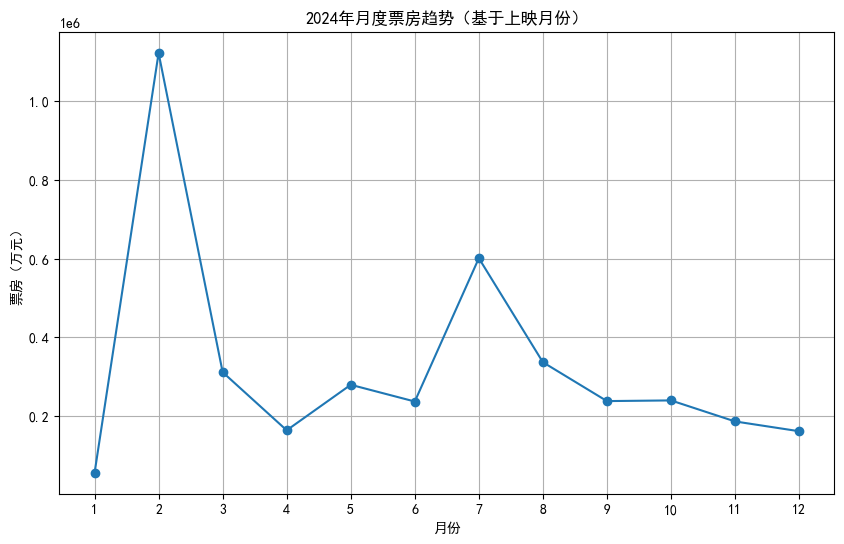

春节档（2月）票房: 1122780 万元，占比: 28.52%
暑期档（7-8月）票房: 938479 万元，占比: 23.84%
国庆档（10月）票房: 240017 万元，占比: 6.10%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 读取电影详情表
df_rankings = pd.read_csv("cleaned_movie_rankings_2024.csv", encoding='utf-8-sig')

# 1. 计算全年总票房（仅限2024年上映的电影）
df_rankings['上映日期'] = pd.to_datetime(df_rankings['上映日期'], format='%Y-%m-%d')
df_2024 = df_rankings[df_rankings['上映日期'].dt.year == 2024].copy()  # 创建独立副本，避免警告
total_box_office = df_2024['票房（万元）'].sum()
print(f"2024年总票房: {total_box_office} 万元")

# 2. 计算全年总观影人次
df_2024.loc[:, '观影人次'] = (df_2024['票房（万元）'] * 10000) / df_2024['平均票价（元）']  # 用 .loc 赋值
total_audience = df_2024['观影人次'].sum()
print(f"2024年总观影人次: {total_audience:.0f} 人")

# 3. 提取上映月份并按月汇总票房
df_2024.loc[:, '上映月份'] = df_2024['上映日期'].dt.month  # 用 .loc 赋值
monthly_box_office = df_2024.groupby('上映月份')['票房（万元）'].sum().reset_index()

# 4. 绘制月度票房趋势图
plt.figure(figsize=(10, 6))
plt.plot(monthly_box_office['上映月份'], monthly_box_office['票房（万元）'], marker='o')
plt.title('2024年月度票房趋势（基于上映月份）')
plt.xlabel('月份')
plt.ylabel('票房（万元）')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# 5. 分析季节性趋势
feb_box_office = monthly_box_office[monthly_box_office['上映月份'] == 2]['票房（万元）'].sum()
summer_box_office = monthly_box_office[monthly_box_office['上映月份'].isin([7, 8])]['票房（万元）'].sum()
oct_box_office = monthly_box_office[monthly_box_office['上映月份'] == 10]['票房（万元）'].sum()
total_box_office_2024 = monthly_box_office['票房（万元）'].sum()

print(f"春节档（2月）票房: {feb_box_office} 万元，占比: {feb_box_office / total_box_office_2024:.2%}")
print(f"暑期档（7-8月）票房: {summer_box_office} 万元，占比: {summer_box_office / total_box_office_2024:.2%}")
print(f"国庆档（10月）票房: {oct_box_office} 万元，占比: {oct_box_office / total_box_office_2024:.2%}")

In [7]:
monthly_totals = df_top15.groupby('月份')['票房（万元）'].sum()
print("每月票房总和：")
print(monthly_totals)
print(f"总和校验: {monthly_totals.sum()}")

每月票房总和：
月份
1      244051
2     1099108
3      272794
4      209161
5      275650
6      191481
7      516486
8      386695
9      123240
10     342965
11     161690
12     212546
Name: 票房（万元）, dtype: int64
总和校验: 4035867


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取两张表
df_top15 = pd.read_csv("cleaned_top15_movies.csv", encoding='utf-8-sig')
df_rankings = pd.read_csv("cleaned_movie_rankings_2024.csv", encoding='utf-8-sig')

# 调试：检查 df_top15 的统计时间格式
print("df_top15 统计时间唯一值：")
print(df_top15['统计时间'].unique())

# 1. 合并 df_top15 和 df_rankings，获取上映日期
df_merged = df_top15.merge(df_rankings[['电影名称', '上映日期']], 
                          left_on='影片名称', right_on='电影名称', how='left')

# 调试：检查合并结果
print("\n合并后数据前5行：")
print(df_merged[['影片名称', '统计时间', '上映日期', '票房（万元）']].head())

# 2. 将上映日期转换为日期格式
df_merged['上映日期'] = pd.to_datetime(df_merged['上映日期'], format='%Y-%m-%d', errors='coerce')

# 3. 提取上映年份和月份
df_merged['上映年份'] = df_merged['上映日期'].dt.year
df_merged['上映月份'] = df_merged['上映日期'].dt.month

# 4. 筛选上映日期不是 2024 年 1 月的电影
not_jan_2024 = df_merged[~((df_merged['上映年份'] == 2024) & (df_merged['上映月份'] == 1))]

# 5. 筛选 2024 年 1 月的票房数据（修正统计时间为 '2024-01'）
jan_data = not_jan_2024[not_jan_2024['统计时间'] == '2024-01']

# 6. 输出结果
print("\n2024年1月票房中，不是2024年1月上映的电影：")
print(jan_data[['影片名称', '上映日期', '票房（万元）', '人次']])

# 计算这些电影在 1 月的票房贡献
jan_not_2024_contribution = jan_data['票房（万元）'].sum()
jan_total_box_office = df_top15[df_top15['统计时间'] == '2024-01']['票房（万元）'].sum()
print(f"\n2024年1月总票房: {jan_total_box_office} 万元")
print(f"其中，不是2024年1月上映的电影贡献: {jan_not_2024_contribution} 万元")
if jan_total_box_office > 0:
    print(f"占比: {jan_not_2024_contribution / jan_total_box_office:.2%}")
else:
    print("占比: 无法计算（总票房为 0）")

df_top15 统计时间唯一值：
['2024-01' '2024-02' '2024-03' '2024-04' '2024-05' '2024-06' '2024-07'
 '2024-08' '2024-09' '2024-10' '2024-11' '2024-12']

合并后数据前5行：
      影片名称     统计时间        上映日期  票房（万元）
0   年会不能停！  2024-01  2023-12-29   91048
1      金手指  2024-01  2023-12-30   36427
2       潜行  2024-01  2023-12-29   19129
3     临时劫案  2024-01  2024-01-19   18396
4  一闪一闪亮星星  2024-01  2023-12-30   14386

2024年1月票房中，不是2024年1月上映的电影：
               影片名称       上映日期  票房（万元）        人次
0            年会不能停！ 2023-12-29   91048  23172818
1               金手指 2023-12-30   36427   9032235
2                潜行 2023-12-29   19129   4928772
4           一闪一闪亮星星 2023-12-30   14386   3721553
5               三大队 2023-12-15   13201   3144587
6         海王2：失落的王国 2023-12-20   10909   2785329
9             非诚勿扰3 2023-12-30    5630   1359350
10  泰勒·斯威夫特：时代巡回演唱会 2023-12-31    5183   1085649
11        舒克贝塔·五角飞碟 2023-12-30    3589    969689
13      名侦探柯南：黑铁的鱼影 2023-12-16    2250    684973
14               孤军 2023-12-28    1968   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27048\2660246652.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, '月份'] = df_filtered['统计时间'].str.split('-').str[1].astype(int)


按月汇总数据（仅2024年上映电影）：
    月份   票房（万元）         人次
0    1    40331   10365380
1    2  1076686  225573650
2    3   270606   64935024
3    4   204064   50742752
4    5   247798   61417594
5    6   179710   44830708
6    7   504054  122263390
7    8   362035   86827431
8    9   119610   29259764
9   10   324093   80356228
10  11   118311   29669322
11  12   197780   49376193


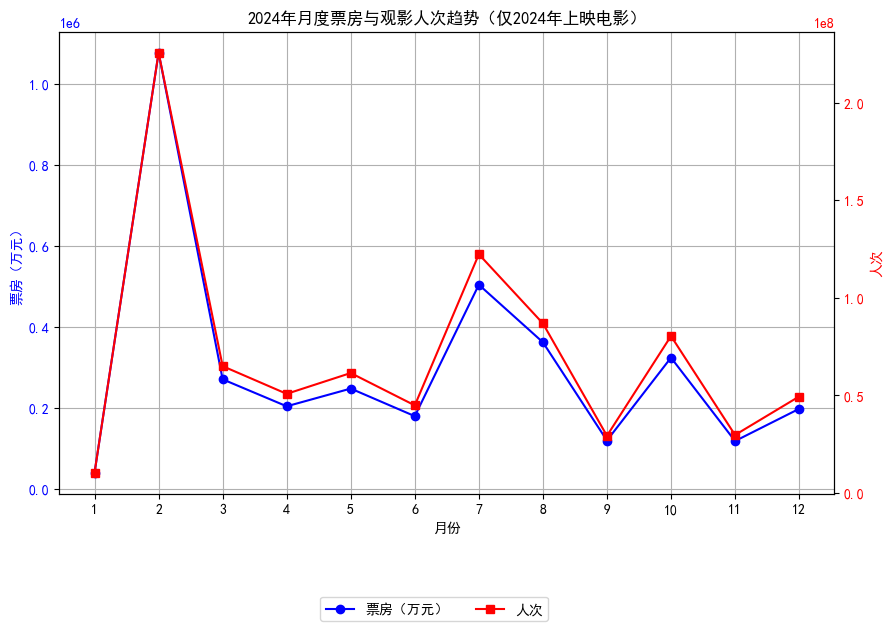

过滤后总票房: 3645078 万元
春节档（2月）票房: 1076686 万元，占比: 29.54%，人次: 225573650
暑期档（7-8月）票房: 866089 万元，占比: 23.76%，人次: 209090821
国庆档（10月）票房: 324093 万元，占比: 8.89%，人次: 80356228


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取两张表
df_top15 = pd.read_csv("cleaned_top15_movies.csv", encoding='utf-8-sig')
df_rankings = pd.read_csv("cleaned_movie_rankings_2024.csv", encoding='utf-8-sig')

# 1. 合并 df_top15 和 df_rankings，获取上映日期
df_merged = df_top15.merge(df_rankings[['电影名称', '上映日期']], 
                          left_on='影片名称', right_on='电影名称', how='left')

# 2. 将上映日期转换为日期格式
df_merged['上映日期'] = pd.to_datetime(df_merged['上映日期'], format='%Y-%m-%d', errors='coerce')

# 3. 提取上映年份
df_merged['上映年份'] = df_merged['上映日期'].dt.year

# 4. 过滤只包含 2024 年上映的电影
df_filtered = df_merged[df_merged['上映年份'] == 2024]

# 5. 提取月份并按月汇总票房和人次（过滤后数据）
df_filtered.loc[:, '月份'] = df_filtered['统计时间'].str.split('-').str[1].astype(int)
monthly_data = df_filtered.groupby('月份')[['票房（万元）', '人次']].sum().reset_index()

# 调试：检查按月汇总结果
print("按月汇总数据（仅2024年上映电影）：")
print(monthly_data)

# 6. 绘制双 y 轴趋势图（过滤后）
fig, ax1 = plt.subplots(figsize=(10, 6))

# y1 轴（左轴）：票房
ax1.plot(monthly_data['月份'], monthly_data['票房（万元）'], marker='o', color='b', label='票房（万元）')
ax1.set_xlabel('月份')
ax1.set_ylabel('票房（万元）', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(range(1, 13))

# y2 轴（右轴）：人次
ax2 = ax1.twinx()
ax2.plot(monthly_data['月份'], monthly_data['人次'], marker='s', color='r', label='人次')
ax2.set_ylabel('人次', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加标题和网格
plt.title('2024年月度票房与观影人次趋势（仅2024年上映电影）')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
ax1.grid(True)

# 显示图表
plt.show()

# 7. 分析季节性趋势（过滤后）
feb_box_office = monthly_data[monthly_data['月份'] == 2]['票房（万元）'].sum()
summer_box_office = monthly_data[monthly_data['月份'].isin([7, 8])]['票房（万元）'].sum()
oct_box_office = monthly_data[monthly_data['月份'] == 10]['票房（万元）'].sum()
total_box_office_2024 = monthly_data['票房（万元）'].sum()

feb_audience = monthly_data[monthly_data['月份'] == 2]['人次'].sum()
summer_audience = monthly_data[monthly_data['月份'].isin([7, 8])]['人次'].sum()
oct_audience = monthly_data[monthly_data['月份'] == 10]['人次'].sum()

print(f"过滤后总票房: {total_box_office_2024} 万元")
print(f"春节档（2月）票房: {feb_box_office} 万元，占比: {feb_box_office / total_box_office_2024:.2%}，人次: {feb_audience}")
print(f"暑期档（7-8月）票房: {summer_box_office} 万元，占比: {summer_box_office / total_box_office_2024:.2%}，人次: {summer_audience}")
print(f"国庆档（10月）票房: {oct_box_office} 万元，占比: {oct_box_office / total_box_office_2024:.2%}，人次: {oct_audience}")

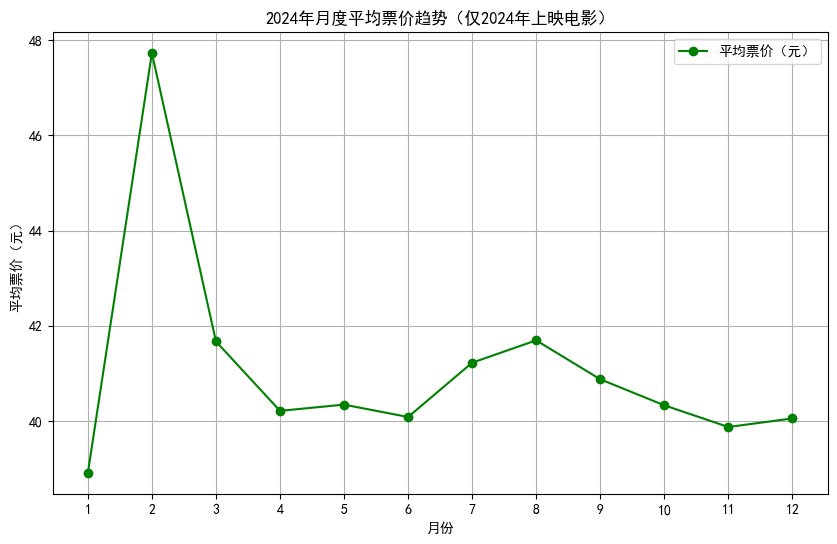

每月平均票价（元）：
    月份    平均票价（元）
0    1  38.909331
1    2  47.731018
2    3  41.673350
3    4  40.215399
4    5  40.346419
5    6  40.086362
6    7  41.226895
7    8  41.695924
8    9  40.878662
9   10  40.332033
10  11  39.876543
11  12  40.055741


In [17]:
# 计算平均票价
monthly_data['平均票价（元）'] = (monthly_data['票房（万元）'] * 10000) / monthly_data['人次']

# 绘制平均票价趋势
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['月份'], monthly_data['平均票价（元）'], marker='o', color='g', label='平均票价（元）')
plt.xlabel('月份')
plt.ylabel('平均票价（元）')
plt.title('2024年月度平均票价趋势（仅2024年上映电影）')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

# 打印每月平均票价
print("每月平均票价（元）：")
print(monthly_data[['月份', '平均票价（元）']])

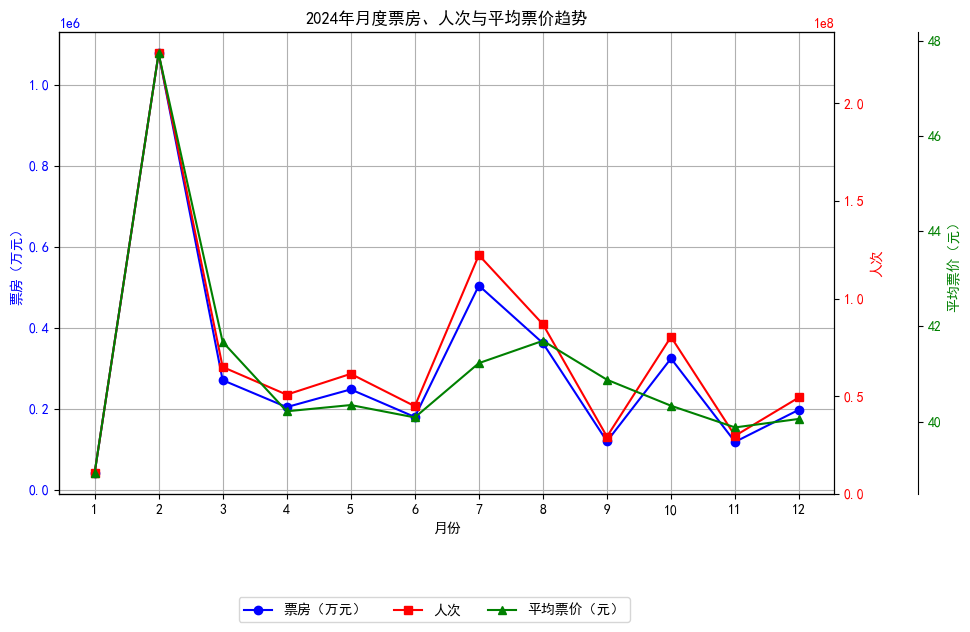

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(monthly_data['月份'], monthly_data['票房（万元）'], marker='o', color='b', label='票房（万元）')
ax1.set_xlabel('月份')
ax1.set_ylabel('票房（万元）', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(range(1, 13))

ax2 = ax1.twinx()
ax2.plot(monthly_data['月份'], monthly_data['人次'], marker='s', color='r', label='人次')
ax2.set_ylabel('人次', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # 移动第三 y 轴
ax3.plot(monthly_data['月份'], monthly_data['平均票价（元）'], marker='^', color='g', label='平均票价（元）')
ax3.set_ylabel('平均票价（元）', color='g')
ax3.tick_params(axis='y', labelcolor='g')

plt.title('2024年月度票房、人次与平均票价趋势')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
ax1.grid(True)
plt.show()

In [34]:
import pandas as pd

# 假设数据已加载
data = pd.read_csv("cleaned_movie_rankings_2024.csv", encoding='utf-8-sig')

# 转换为日期格式
data['上映日期'] = pd.to_datetime(data['上映日期'], errors='coerce')

# 修正《雪豹》和《非礼勿言》的想看人数（从“人”转换为“万人”）
data.loc[data['电影名称'] == '雪豹', '想看人数（万）'] = data.loc[data['电影名称'] == '雪豹', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '非礼勿言', '想看人数（万）'] = data.loc[data['电影名称'] == '非礼勿言', '想看人数（万）'] / 10000

# 定义档期（中秋和国庆档分开）
holidays = {
    '元旦档': ('2023-12-30', '2024-01-01'),
    '春节档': ('2024-02-08', '2024-02-15'),
    '清明档': ('2024-04-02', '2024-04-04'),
    '五一档': ('2024-04-29', '2024-05-03'),
    '端午档': ('2024-06-20', '2024-06-22'),
    '中秋档': ('2024-09-14', '2024-09-18'),
    '国庆档': ('2024-09-30', '2024-10-08')
}

# 函数：分配档期
def assign_holiday(date):
    if pd.isna(date):
        return '非档期'
    for holiday, (start, end) in holidays.items():
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        if start_date <= date <= end_date:
            return holiday
    return '非档期'

# 分配档期
data.loc[:, '档期'] = data['上映日期'].apply(assign_holiday)

# 筛选档期电影并提取“想看人数”和“票房”
holiday_movies = data[data['档期'] != '非档期'][['档期', '电影名称', '想看人数（万）', '票房（万元）']]

# 按档期排序
holiday_movies = holiday_movies.sort_values(by='档期')

# 输出结果
for holiday in holidays.keys():
    print(f"\n{holiday}：")
    movies = holiday_movies[holiday_movies['档期'] == holiday]
    if movies.empty:
        print("无电影")
    else:
        for _, row in movies.iterrows():
            print(f"电影名称：{row['电影名称']}，想看人数：{row['想看人数（万）']}万，票房：{row['票房（万元）']}万元")


元旦档：
电影名称：一闪一闪亮星星，想看人数：197.5万，票房：14980万元
电影名称：舒克贝塔·五角飞碟，想看人数：6.8万，票房：4324万元
电影名称：泰勒·斯威夫特：时代巡回演唱会，想看人数：21.6万，票房：6102万元
电影名称：非诚勿扰3，想看人数：7.8万，票房：5900万元
电影名称：金手指，想看人数：35.1万，票房：41782万元

春节档：
电影名称：八戒之天蓬下界，想看人数：0.0万，票房：358万元
电影名称：第二十条，想看人数：54.1万，票房：242909万元
电影名称：飞驰人生2，想看人数：79.7万，票房：336084万元
电影名称：熊出没·逆转时空，想看人数：72.1万，票房：198383万元
电影名称：热辣滚烫，想看人数：58.8万，票房：341720万元

清明档：
电影名称：大“反”派，想看人数：3.4万，票房：5705万元
电影名称：冰雪女王5：融冰之战，想看人数：0.0万，票房：939万元
电影名称：雪豹，想看人数：0.6126万，票房：848万元
电影名称：午夜怪谈，想看人数：0.0万，票房：322万元
电影名称：黄雀在后！，想看人数：22.1万，票房：10140万元
电影名称：草木人间，想看人数：7.7万，票房：12173万元
电影名称：你想活出怎样的人生，想看人数：70.8万，票房：79116万元

五一档：
电影名称：没有一顿火锅解决不了的事，想看人数：14.0万，票房：5442万元
电影名称：穿过月亮的旅行，想看人数：17.9万，票房：4584万元
电影名称：维和防暴队，想看人数：57.7万，票房：51172万元
电影名称：猪猪侠大电影·星际行动，想看人数：1.7万，票房：5474万元
电影名称：九龙城寨之围城，想看人数：15.5万，票房：68500万元
电影名称：哈尔的移动城堡，想看人数：63.7万，票房：16779万元
电影名称：间谍过家家 代号：白，想看人数：33.7万，票房：29336万元
电影名称：末路狂花钱，想看人数：17.3万，票房：78180万元

端午档：
电影名称：沙漏，想看人数：12.5万，票房：3006万元
电影名称：绝地战警：生死与共，想看人数：0.0万，票房：3667万元
电影名称：唤醒者，想看人数：0.0万，票房：525万元
电影名称：头脑特工队2，想看人数：14.8万，票

In [38]:
import pandas as pd

# 假设数据已加载
data = pd.read_csv("cleaned_movie_rankings_2024.csv", encoding='utf-8-sig')

# 转换为日期格式
data['上映日期'] = pd.to_datetime(data['上映日期'], errors='coerce')

# 修正《雪豹》、《非礼勿言》、《狗神》、《泳者之心》的想看人数（从“人”转换为“万人”）
data.loc[data['电影名称'] == '雪豹', '想看人数（万）'] = data.loc[data['电影名称'] == '雪豹', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '非礼勿言', '想看人数（万）'] = data.loc[data['电影名称'] == '非礼勿言', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '狗神', '想看人数（万）'] = data.loc[data['电影名称'] == '狗神', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '泳者之心', '想看人数（万）'] = data.loc[data['电影名称'] == '泳者之心', '想看人数（万）'] / 10000

# 定义档期（中秋和国庆档分开）
holidays = {
    '元旦档': ('2023-12-30', '2024-01-01'),
    '春节档': ('2024-02-08', '2024-02-15'),
    '清明档': ('2024-04-02', '2024-04-04'),
    '五一档': ('2024-04-29', '2024-05-03'),
    '端午档': ('2024-06-20', '2024-06-22'),
    '中秋档': ('2024-09-14', '2024-09-18'),
    '国庆档': ('2024-09-30', '2024-10-08')
}

# 函数：分配档期
def assign_holiday(date):
    if pd.isna(date):
        return '非档期'
    for holiday, (start, end) in holidays.items():
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        if start_date <= date <= end_date:
            return holiday
    return '非档期'

# 分配档期
data.loc[:, '档期'] = data['上映日期'].apply(assign_holiday)

# 筛选档期电影并提取“想看人数”和“票房”
holiday_movies = data[data['档期'] != '非档期'][['档期', '电影名称', '想看人数（万）', '票房（万元）']]

# 按档期排序
holiday_movies = holiday_movies.sort_values(by='档期')

# 计算每个档期的总票房、票房冠军、电影数量
summary_data = []
for holiday in holidays.keys():
    movies = holiday_movies[holiday_movies['档期'] == holiday]
    if movies.empty:
        summary_data.append({
            '档期': holiday,
            '总票房（亿元）': 0,
            '票房冠军': '无',
            '冠军票房（亿元）': 0,
            '上映电影数量': 0
        })
    else:
        total_box_office = movies['票房（万元）'].sum() / 10000  # 转换为亿元
        movie_count = len(movies)
        champion = movies.loc[movies['票房（万元）'].idxmax()] if not movies.empty else None
        champion_name = champion['电影名称'] if champion is not None else '无'
        champion_box_office = champion['票房（万元）'] / 10000 if champion is not None else 0  # 转换为亿元
        summary_data.append({
            '档期': holiday,
            '总票房（亿元）': round(total_box_office, 2),
            '票房冠军': champion_name,
            '冠军票房（亿元）': round(champion_box_office, 2),
            '上映电影数量': movie_count
        })

# 转换为 DataFrame
summary_df = pd.DataFrame(summary_data)

# 优化表格输出，设置对齐方式
print("\n档期票房统计表格：")
# 使用 format 方法自定义对齐
print(f"{'档期':^10} | {'总票房（亿元）':^15} | {'票房冠军':^20} | {'冠军票房（亿元）':^15} | {'上映电影数量':^10}")
print("-" * 80)
for _, row in summary_df.iterrows():
    print(f"{row['档期']:^10} | {row['总票房（亿元）']:^20.2f} | {row['票房冠军']:^18} | {row['冠军票房（亿元）']:^15.2f} | {row['上映电影数量']:^10}")


档期票房统计表格：
    档期     |     总票房（亿元）     |         票房冠军         |    冠军票房（亿元）     |   上映电影数量  
--------------------------------------------------------------------------------
   元旦档     |         7.31         |        金手指         |      4.18       |     5     
   春节档     |        111.95        |        热辣滚烫        |      34.17      |     5     
   清明档     |        10.92         |     你想活出怎样的人生      |      7.91       |     7     
   五一档     |        25.95         |       末路狂花钱        |      7.82       |     8     
   端午档     |         9.15         |      云边有个小卖部       |      4.99       |     5     
   中秋档     |         3.32         |       出走的决心        |      1.24       |     9     
   国庆档     |        27.84         |      志愿军：存亡之战      |      12.07      |     10    


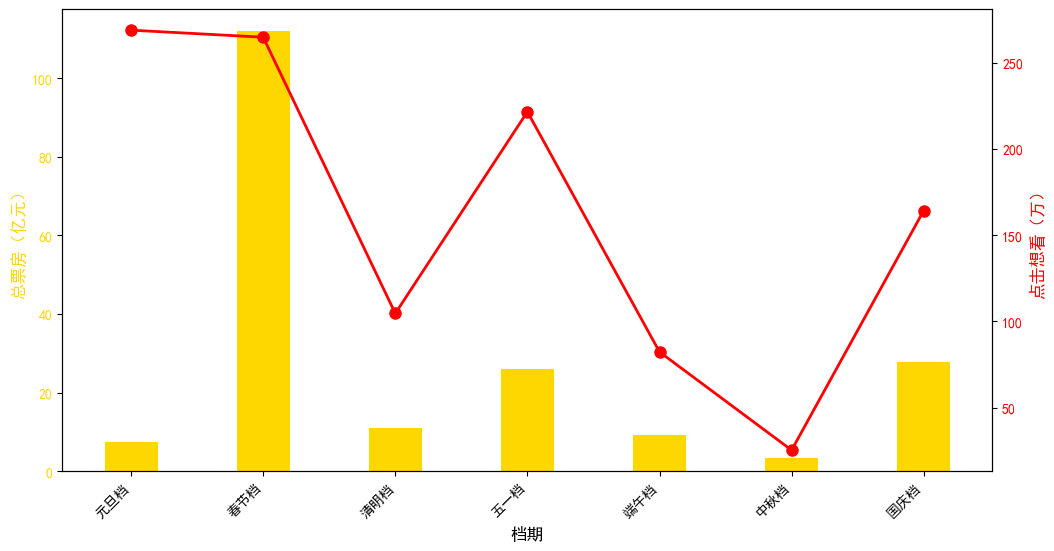

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 假设数据已加载（与表格代码相同）
data = pd.read_csv("cleaned_movie_rankings_2024.csv", encoding='utf-8-sig')
data['上映日期'] = pd.to_datetime(data['上映日期'], errors='coerce')

# 修正《雪豹》、《非礼勿言》、《狗神》、《泳者之心》的想看人数
data.loc[data['电影名称'] == '雪豹', '想看人数（万）'] = data.loc[data['电影名称'] == '雪豹', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '非礼勿言', '想看人数（万）'] = data.loc[data['电影名称'] == '非礼勿言', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '狗神', '想看人数（万）'] = data.loc[data['电影名称'] == '狗神', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '泳者之心', '想看人数（万）'] = data.loc[data['电影名称'] == '泳者之心', '想看人数（万）'] / 10000

# 定义档期
holidays = {
    '元旦档': ('2023-12-30', '2024-01-01'),
    '春节档': ('2024-02-08', '2024-02-15'),
    '清明档': ('2024-04-02', '2024-04-04'),
    '五一档': ('2024-04-29', '2024-05-03'),
    '端午档': ('2024-06-20', '2024-06-22'),
    '中秋档': ('2024-09-14', '2024-09-18'),
    '国庆档': ('2024-09-30', '2024-10-08')
}

# 分配档期
def assign_holiday(date):
    if pd.isna(date):
        return '非档期'
    for holiday, (start, end) in holidays.items():
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        if start_date <= date <= end_date:
            return holiday
    return '非档期'

data.loc[:, '档期'] = data['上映日期'].apply(assign_holiday)

# 筛选档期电影
holiday_movies = data[data['档期'] != '非档期'][['档期', '电影名称', '想看人数（万）', '票房（万元）']]

# 计算每个档期的票房总量和想看总数
holiday_stats = holiday_movies.groupby('档期').agg({
    '票房（万元）': 'sum',
    '想看人数（万）': 'sum'
}).reset_index()

# 转换为亿元
holiday_stats['票房（亿元）'] = holiday_stats['票房（万元）'] / 10000

# 按档期顺序排序
holiday_stats['档期'] = pd.Categorical(holiday_stats['档期'], categories=list(holidays.keys()), ordered=True)
holiday_stats = holiday_stats.sort_values('档期')
# 绘制图表
fig, ax1 = plt.subplots(figsize=(12, 6))

# 柱状图：票房总量，金色
ax1.bar(holiday_stats['档期'], holiday_stats['票房（亿元）'], color='gold', label='档期总票房', width=0.4)
ax1.set_xlabel('档期', fontsize=12)
ax1.set_ylabel('总票房（亿元）', color='gold', fontsize=12)
ax1.tick_params(axis='y', labelcolor='gold')
ax1.tick_params(axis='x', rotation=45, labelsize=10)

# 调整 X 轴间距
plt.xticks(range(len(holiday_stats['档期'])), holiday_stats['档期'], ha='right')

# 折线图：想看人数，红色
ax2 = ax1.twinx()
ax2.plot(holiday_stats['档期'], holiday_stats['想看人数（万）'], color='red', marker='o', label='点击想看', linewidth=2, markersize=8)
ax2.set_ylabel('点击想看（万）', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

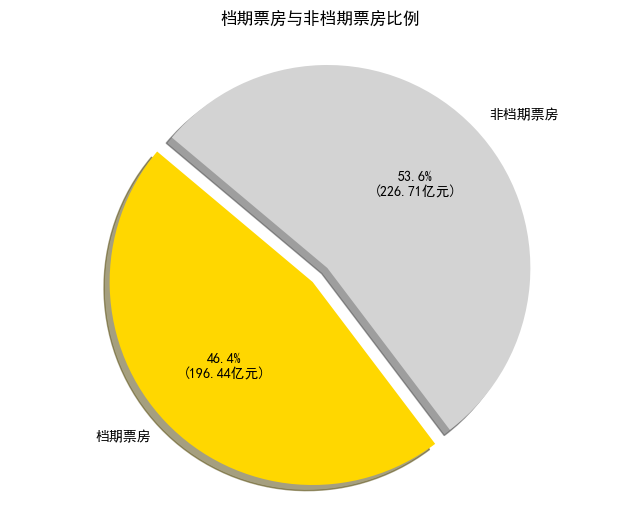

档期票房：196.44 亿元
非档期票房：226.71 亿元


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设数据已加载
data = pd.read_csv("cleaned_movie_rankings_2024.csv", encoding='utf-8-sig')

# 转换为日期格式
data['上映日期'] = pd.to_datetime(data['上映日期'], errors='coerce')

# 修正想看人数
data.loc[data['电影名称'] == '雪豹', '想看人数（万）'] = data.loc[data['电影名称'] == '雪豹', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '非礼勿言', '想看人数（万）'] = data.loc[data['电影名称'] == '非礼勿言', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '狗神', '想看人数（万）'] = data.loc[data['电影名称'] == '狗神', '想看人数（万）'] / 10000
data.loc[data['电影名称'] == '泳者之心', '想看人数（万）'] = data.loc[data['电影名称'] == '泳者之心', '想看人数（万）'] / 10000

# 定义档期
holidays = {
    '元旦档': ('2023-12-30', '2024-01-01'),
    '春节档': ('2024-02-08', '2024-02-15'),
    '清明档': ('2024-04-02', '2024-04-04'),
    '五一档': ('2024-04-29', '2024-05-03'),
    '端午档': ('2024-06-20', '2024-06-22'),
    '中秋档': ('2024-09-14', '2024-09-18'),
    '国庆档': ('2024-09-30', '2024-10-08')
}

# 分配档期
def assign_holiday(date):
    if pd.isna(date):
        return '非档期'
    for holiday, (start, end) in holidays.items():
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)
        if start_date <= date <= end_date:
            return holiday
    return '非档期'

data.loc[:, '档期'] = data['上映日期'].apply(assign_holiday)

# 计算档期和非档期票房
holiday_box_office = data[data['档期'] != '非档期']['票房（万元）'].sum() / 10000  # 转换为亿元
non_holiday_box_office = data[data['档期'] == '非档期']['票房（万元）'].sum() / 10000  # 转换为亿元

# 饼状图数据
labels = ['档期票房', '非档期票房']
sizes = [holiday_box_office, non_holiday_box_office]
colors = ['gold', 'lightgray']
explode = (0.1, 0)  # 突出档期票房

# 绘制饼状图
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: f'{pct:.1f}%\n({sizes[int(pct/100*len(sizes))]:.2f}亿元)', shadow=True, startangle=140)
plt.title('档期票房与非档期票房比例', pad=15)
plt.axis('equal')  # 确保饼图为圆形
plt.show()

# 打印具体金额
print(f"档期票房：{holiday_box_office:.2f} 亿元")
print(f"非档期票房：{non_holiday_box_office:.2f} 亿元")

In [49]:
import pandas as pd

# 加载数据
data = pd.read_csv("cleaned_top15_movies.csv", encoding='utf-8-sig')

# 转换为日期格式并提取月份
data['统计时间'] = pd.to_datetime(data['统计时间'], format='%Y-%m')  # 调整格式为 %Y-%m
data['月份'] = data['统计时间'].dt.strftime('%b-%y')  # 转换为 Jan-24 格式用于显示

# 按月份和票房排序，提取每个月的 TOP15
top15_movies = {}
for month in data['月份'].unique():
    month_data = data[data['月份'] == month].sort_values(by='票房（万元）', ascending=False).head(15)
    top15_movies[month] = set(month_data['影片名称'])

# 查找连续两个月都出现在 TOP15 的电影
continuous_top15 = {}
for i in range(len(data['月份'].unique()) - 1):
    current_month = data['月份'].unique()[i]
    next_month = data['月份'].unique()[i + 1]
    common_movies = top15_movies[current_month].intersection(top15_movies[next_month])
    if common_movies:
        continuous_top15[f"{current_month} to {next_month}"] = list(common_movies)

# 输出结果
print("连续两个月进入 TOP15 的电影：")
for period, movies in continuous_top15.items():
    print(f"\n{period}:")
    for movie in movies:
        print(f"- {movie}")

# 可选：将结果保存为表格
result_df = pd.DataFrame([(period, movie) for period, movies in continuous_top15.items() for movie in movies], columns=['时间段', '电影名称'])
print("\n结果表格：")
print(result_df.to_string(index=False))

连续两个月进入 TOP15 的电影：

Jan-24 to Feb-24:
- 动物园里有什么？
- 养蜂人
- 年会不能停！
- 金手指
- 临时劫案
- 海王2：失落的王国

Feb-24 to Mar-24:
- 我们一起摇太阳
- 热辣滚烫
- 周处除三害
- 飞驰人生2
- 熊出没·逆转时空
- 红毯先生
- 第二十条

Mar-24 to Apr-24:
- 我们一起摇太阳
- 周处除三害
- 哥斯拉大战金刚2：帝国崛起
- 熊出没·逆转时空
- 堕落的审判
- 沙丘2
- 功夫熊猫4

Apr-24 to May-24:
- 九龙城寨之围城
- 哥斯拉大战金刚2：帝国崛起
- 哈尔的移动城堡
- 功夫熊猫4

May-24 to Jun-24:
- 九龙城寨之围城
- 末路狂花钱

Jun-24 to Jul-24:
- 寂静之地：入侵日
- 头脑特工队2
- 云边有个小卖部
- 海关战线

Jul-24 to Aug-24:
- 抓娃娃
- 默杀
- 解密
- 神偷奶爸4
- 死侍与金刚狼

Aug-24 to Sep-24:
- 异形：夺命舰
- 抓娃娃
- 重生
- 白蛇：浮生
- 姥姥的外孙
- 逆鳞
- 名侦探柯南：百万美元的五枝星

Sep-24 to Oct-24:
- 志愿军：存亡之战
- 变形金刚：起源

Oct-24 to Nov-24:
- 志愿军：存亡之战
- 毒液：最后一舞
- 乔妍的心事

Nov-24 to Dec-24:
- 海洋奇缘2
- 蜡笔小新：我们的恐龙日记
- 好东西

结果表格：
             时间段           电影名称
Jan-24 to Feb-24       动物园里有什么？
Jan-24 to Feb-24            养蜂人
Jan-24 to Feb-24         年会不能停！
Jan-24 to Feb-24            金手指
Jan-24 to Feb-24           临时劫案
Jan-24 to Feb-24      海王2：失落的王国
Feb-24 to Mar-24        我们一起摇太阳
Feb-24 to Mar-24           热辣滚烫
Feb-24 to Mar-24          周处除三害


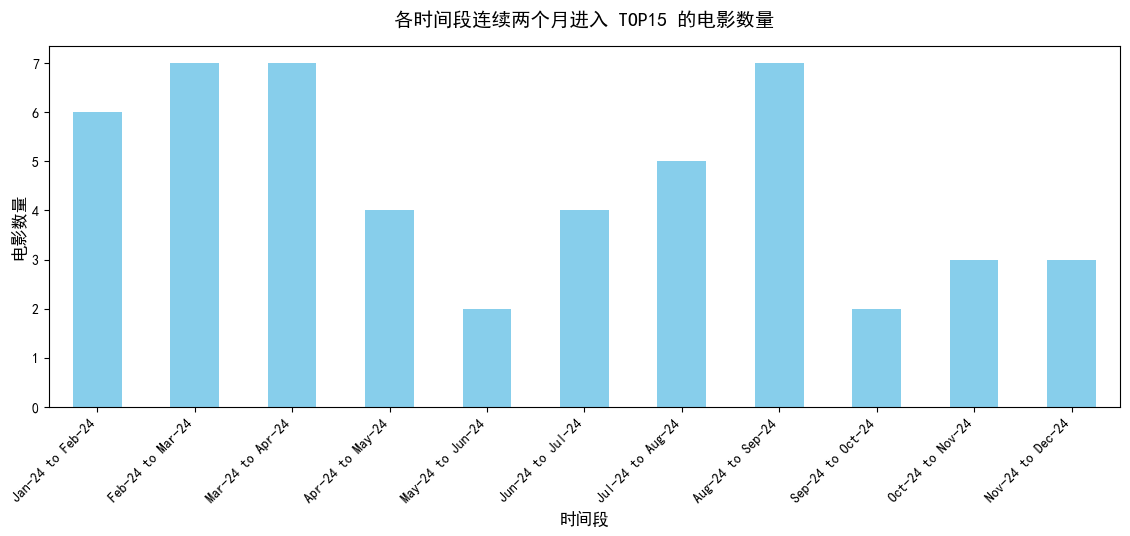

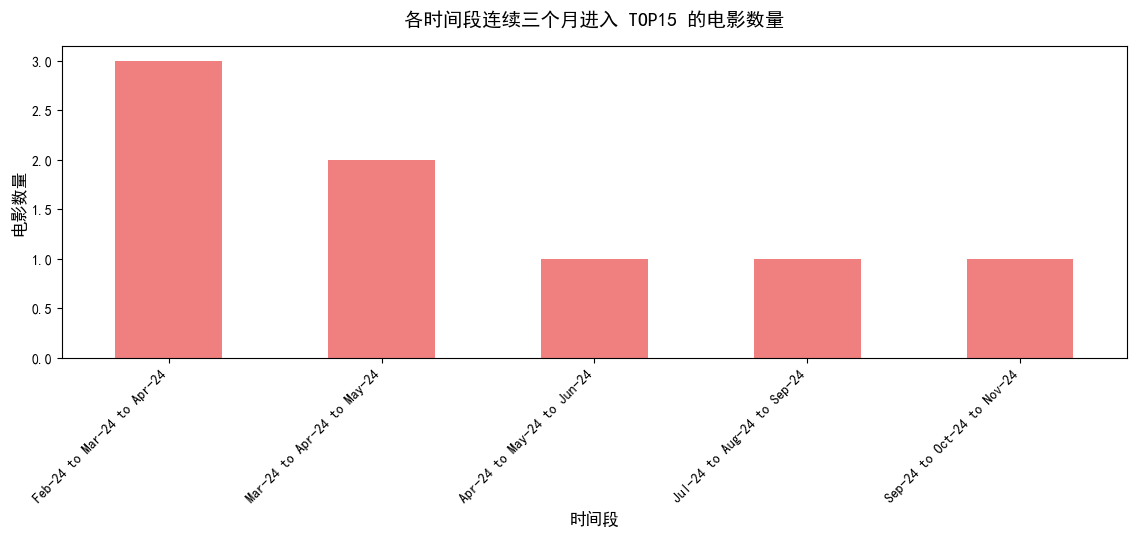

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
data = pd.read_csv("cleaned_top15_movies.csv", encoding='utf-8-sig')

# 转换为日期格式并提取月份
data['统计时间'] = pd.to_datetime(data['统计时间'], format='%Y-%m')
data['月份'] = data['统计时间'].dt.strftime('%b-%y')

# 按月份和票房排序，提取每个月的 TOP15
top15_movies = {}
for month in data['月份'].unique():
    month_data = data[data['月份'] == month].sort_values(by='票房（万元）', ascending=False).head(15)
    top15_movies[month] = set(month_data['影片名称'])

# 查找连续两个月和三个月都出现在 TOP15 的电影
continuous_top15 = {}
continuous_top15_three = {}
for i in range(len(data['月份'].unique()) - 1):
    current_month = data['月份'].unique()[i]
    next_month = data['月份'].unique()[i + 1]
    common_movies = top15_movies[current_month].intersection(top15_movies[next_month])
    if common_movies:
        continuous_top15[f"{current_month} to {next_month}"] = list(common_movies)
for i in range(len(data['月份'].unique()) - 2):
    month1 = data['月份'].unique()[i]
    month2 = data['月份'].unique()[i + 1]
    month3 = data['月份'].unique()[i + 2]
    common_movies = top15_movies[month1].intersection(top15_movies[month2], top15_movies[month3])
    if common_movies:
        continuous_top15_three[f"{month1} to {month2} to {month3}"] = list(common_movies)

# 增强表格：添加票房和人次信息
result_data = []
for period, movies in continuous_top15.items():
    start_month, end_month = period.split(" to ")
    for movie in movies:
        ticket_start = data[(data['月份'] == start_month) & (data['影片名称'] == movie)]['票房（万元）'].iloc[0] / 10000 if not data[(data['月份'] == start_month) & (data['影片名称'] == movie)].empty else 0
        ticket_end = data[(data['月份'] == end_month) & (data['影片名称'] == movie)]['票房（万元）'].iloc[0] / 10000 if not data[(data['月份'] == end_month) & (data['影片名称'] == movie)].empty else 0
        people_start = data[(data['月份'] == start_month) & (data['影片名称'] == movie)]['人次'].iloc[0] / 10000 if not data[(data['月份'] == start_month) & (data['影片名称'] == movie)].empty else 0
        people_end = data[(data['月份'] == end_month) & (data['影片名称'] == movie)]['人次'].iloc[0] / 10000 if not data[(data['月份'] == end_month) & (data['影片名称'] == movie)].empty else 0
        result_data.append({
            '时间段': period,
            '电影名称': movie,
            f'{start_month} 票房（亿元）': round(ticket_start, 2),
            f'{end_month} 票房（亿元）': round(ticket_end, 2),
            f'{start_month} 人次（万）': round(people_start, 2),
            f'{end_month} 人次（万）': round(people_end, 2)
        })

# 转换为 DataFrame
result_df = pd.DataFrame(result_data)

# 柱状图：展示每个时间段的连续 TOP15 电影数量
period_counts = pd.Series({period: len(movies) for period, movies in continuous_top15.items()})
plt.figure(figsize=(12, 6))
period_counts.plot(kind='bar', color='skyblue')
plt.title('各时间段连续两个月进入 TOP15 的电影数量', fontsize=14, pad=15)
plt.xlabel('时间段', fontsize=12)
plt.ylabel('电影数量', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)
plt.show()

# 连续三月柱状图
if continuous_top15_three:
    three_month_counts = pd.Series({period: len(movies) for period, movies in continuous_top15_three.items()})
    plt.figure(figsize=(12, 6))
    three_month_counts.plot(kind='bar', color='lightcoral')
    plt.title('各时间段连续三个月进入 TOP15 的电影数量', fontsize=14, pad=15)
    plt.xlabel('时间段', fontsize=12)
    plt.ylabel('电影数量', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(pad=3.0)
    plt.show()
else:
    print("没有连续三个月进入 TOP15 的电影。")


连续三个月上榜的电影（显示每月票房占比和总票房）：
        电影名称         |    连续月数    |    第一月 占比（%）    |    第二月 占比（%）    |    第三月 占比（%）    |     总票房（亿元）    
------------------------------------------------------------------------------------------
      我们一起摇太阳        |     3      |      42.39      |      33.71      |      23.90      |      2.74      
      熊出没·逆转时空       |     3      |      0.73       |      92.40      |      6.87       |      19.86     
       周处除三害         |     3      |      3.26       |      2.62       |      94.12      |      6.65      
       功夫熊猫4         |     3      |      28.45      |      66.83      |      4.72       |      3.68      
   哥斯拉大战金刚2：帝国崛起     |     3      |      62.79      |      33.25      |      3.95       |      9.54      
      九龙城寨之围城        |     3      |      11.77      |      6.60       |      81.63      |      6.85      
        抓娃娃          |     3      |      25.03      |      72.79      |      2.18       |      33.26     
      志愿军：存亡之战       |     3      

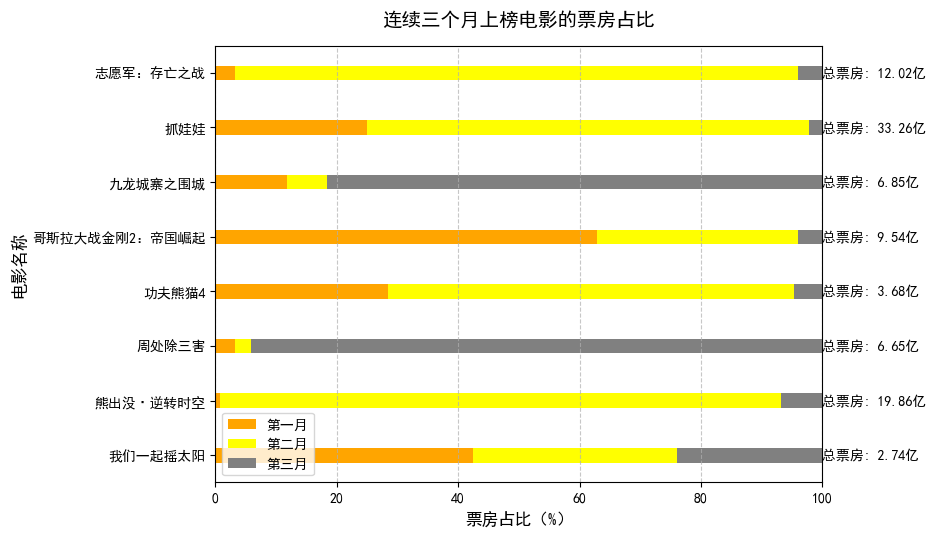

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
data = pd.read_csv("cleaned_top15_movies.csv", encoding='utf-8-sig')

# 转换为日期格式并提取月份
data['统计时间'] = pd.to_datetime(data['统计时间'], format='%Y-%m')
data['月份'] = data['统计时间'].dt.strftime('%b-%y')

# 按月份和票房排序，提取每个月的 TOP15
top15_movies = {month: set(data[data['月份'] == month].sort_values(by='票房（万元）', ascending=False).head(15)['影片名称']) for month in data['月份'].unique()}

# 查找连续三个月上榜的电影
long_term_movies = {}
months_list = data['月份'].unique().tolist()
for i in range(len(months_list) - 2):  # 仅检查三个月
    window = months_list[i:i + 3]
    common_movies = set(top15_movies[window[0]])
    for month in window[1:]:
        common_movies = common_movies.intersection(top15_movies[month])
    if common_movies:
        for movie in common_movies:
            if 3 not in long_term_movies:
                long_term_movies[3] = {}
            if tuple(window) not in long_term_movies[3]:
                long_term_movies[3][tuple(window)] = set()
            long_term_movies[3][tuple(window)].add(movie)

# 收集连续三个月电影的月度票房数据
long_term_movie_data = {}
for duration, periods in long_term_movies.items():
    for period, movies in periods.items():
        for movie in movies:
            if movie not in long_term_movie_data:
                long_term_movie_data[movie] = {}
            for month in period:
                ticket = data[(data['月份'] == month) & (data['影片名称'] == movie)]['票房（万元）'].iloc[0] / 10000 if not data[(data['月份'] == month) & (data['影片名称'] == movie)].empty else 0
                long_term_movie_data[movie][month] = ticket

# 整理数据并计算票房占比
strong_aftermath_movies = []
for movie, monthly_tickets in long_term_movie_data.items():
    months = sorted(monthly_tickets.keys())
    if len(months) == 3:  # 仅保留连续三个月
        total_ticket = sum(monthly_tickets.values())
        proportions = [round((monthly_tickets[month] / total_ticket * 100), 2) for month in months]
        strong_aftermath_movies.append({
            '电影名称': movie,
            '连续月数': len(months),
            '第一月 占比（%）': proportions[0],
            '第二月 占比（%）': proportions[1],
            '第三月 占比（%）': proportions[2],
            '总票房（亿元）': round(total_ticket, 2),
            '连续月份': months,
            '月度票房（亿元）': [round(monthly_tickets[month], 2) for month in months]
        })

# 转换为 DataFrame
strong_aftermath_df = pd.DataFrame(strong_aftermath_movies)

# 表格输出，显示每个月的票房占比和总票房
print("\n连续三个月上榜的电影（显示每月票房占比和总票房）：")
print(f"{'电影名称':^20} | {'连续月数':^10} | {'第一月 占比（%）':^15} | {'第二月 占比（%）':^15} | {'第三月 占比（%）':^15} | {'总票房（亿元）':^15}")
print("-" * 90)
for i, row in strong_aftermath_df.iterrows():
    print(f"{row['电影名称'][:20]:^20} | {row['连续月数']:^10} | {row['第一月 占比（%）']:^15.2f} | {row['第二月 占比（%）']:^15.2f} | {row['第三月 占比（%）']:^15.2f} | {row['总票房（亿元）']:^15.2f}")

# 横向分段条形图
if not strong_aftermath_df.empty:
    plt.figure(figsize=(10, 6))
    bar_width = 0.8  # 调整条形宽度
    index = range(len(strong_aftermath_df))
    
    # 绘制三段横向条形
    plt.barh(index, strong_aftermath_df['第一月 占比（%）'], bar_width * 0.33, label='第一月', color='orange', left=0)
    plt.barh(index, strong_aftermath_df['第二月 占比（%）'], bar_width * 0.33, label='第二月', color='yellow', left=strong_aftermath_df['第一月 占比（%）'])
    plt.barh(index, strong_aftermath_df['第三月 占比（%）'], bar_width * 0.33, label='第三月', color='gray', left=strong_aftermath_df['第一月 占比（%）'] + strong_aftermath_df['第二月 占比（%）'])
    
    plt.xlabel('票房占比（%）', fontsize=12)
    plt.ylabel('电影名称', fontsize=12)
    plt.title('连续三个月上榜电影的票房占比', fontsize=14, pad=15)
    plt.yticks(index, strong_aftermath_df['电影名称'])
    plt.legend()
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    # 添加总票房标签
    for i, v in enumerate(strong_aftermath_df['总票房（亿元）']):
        plt.text(100, i, f'总票房: {v}亿', va='center')
    plt.xlim(0, 100)
    plt.tight_layout(pad=3.0)
    plt.show()
else:
    print("没有连续三个月上榜的电影。")


连续三个月上榜的电影（显示每月票房金额和上映日期）：
        电影名称         |     上映日期     |    连续月数    |   第一月 票房（亿元）    |   第二月 票房（亿元）    |   第三月 票房（亿元）    |     总票房（亿元）    
----------------------------------------------------------------------------------------------------------------
      我们一起摇太阳       
     2024-03-30      |     3      |      1.16       |      0.93       |      0.66       |      2.74      
      熊出没·逆转时空      
     2024-02-10      |     3      |      0.15       |      18.35      |      1.36       |      19.86     
       周处除三害        
     2024-03-01      |     3      |      0.22       |      0.17       |      6.26       |      6.65      
       功夫熊猫4        
     2024-03-22      |     3      |      1.05       |      2.46       |      0.17       |      3.68      
   哥斯拉大战金刚2：帝国崛起    
     2024-03-29      |     3      |      5.99       |      3.17       |      0.38       |      9.54      
      九龙城寨之围城       
     2024-05-01      |     3      |      0.81       |      0.45       |      5.59 

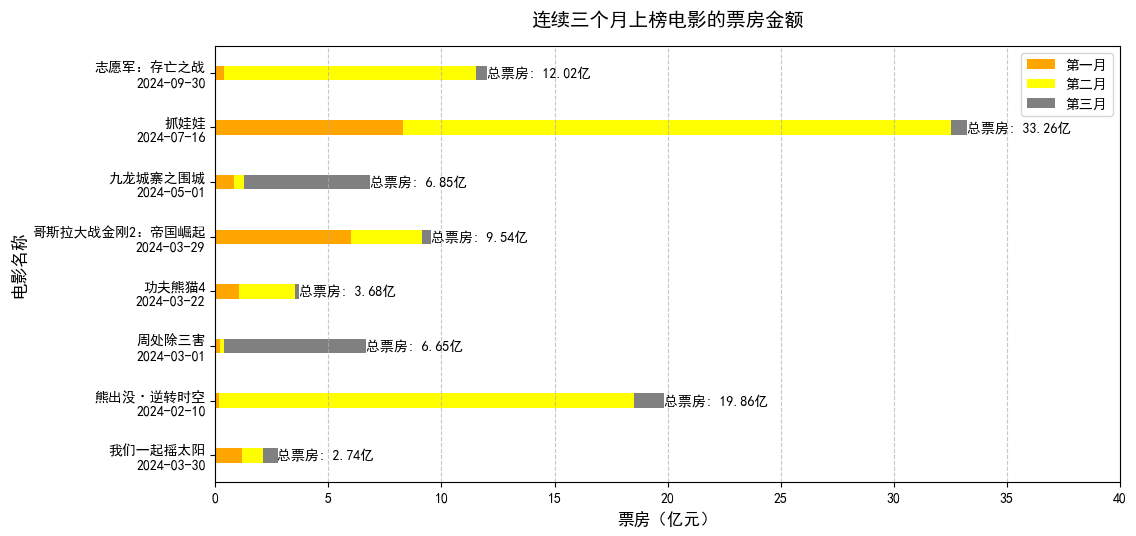

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
data = pd.read_csv("cleaned_top15_movies.csv", encoding='utf-8-sig')  # 月度票房排名数据
movie_data = pd.read_csv("cleaned_movie_rankings_2024.csv", encoding='utf-8-sig')  # 电影详细信息

# 转换为日期格式并提取月份
data['统计时间'] = pd.to_datetime(data['统计时间'], format='%Y-%m')
data['月份'] = data['统计时间'].dt.strftime('%b-%y')

# 按月份和票房排序，提取每个月的 TOP15
top15_movies = {month: set(data[data['月份'] == month].sort_values(by='票房（万元）', ascending=False).head(15)['影片名称']) for month in data['月份'].unique()}

# 查找连续三个月上榜的电影
long_term_movies = {}
months_list = data['月份'].unique().tolist()
for i in range(len(months_list) - 2):  # 仅检查三个月
    window = months_list[i:i + 3]
    common_movies = set(top15_movies[window[0]])
    for month in window[1:]:
        common_movies = common_movies.intersection(top15_movies[month])
    if common_movies:
        for movie in common_movies:
            if 3 not in long_term_movies:
                long_term_movies[3] = {}
            if tuple(window) not in long_term_movies[3]:
                long_term_movies[3][tuple(window)] = set()
            long_term_movies[3][tuple(window)].add(movie)

# 收集连续三个月电影的月度票房数据和上映日期
long_term_movie_data = {}
for duration, periods in long_term_movies.items():
    for period, movies in periods.items():
        for movie in movies:
            if movie not in long_term_movie_data:
                long_term_movie_data[movie] = {}
            for month in period:
                ticket = data[(data['月份'] == month) & (data['影片名称'] == movie)]['票房（万元）'].iloc[0] / 10000 if not data[(data['月份'] == month) & (data['影片名称'] == movie)].empty else 0
                long_term_movie_data[movie][month] = ticket
            # 获取上映日期
            release_date = movie_data[movie_data['电影名称'] == movie]['上映日期'].iloc[0] if not movie_data[movie_data['电影名称'] == movie].empty else '未知'

# 整理数据
strong_aftermath_movies = []
for movie, monthly_tickets in long_term_movie_data.items():
    months = sorted(monthly_tickets.keys())
    if len(months) == 3:  # 仅保留连续三个月
        total_ticket = sum(monthly_tickets.values())
        release_date = movie_data[movie_data['电影名称'] == movie]['上映日期'].iloc[0] if not movie_data[movie_data['电影名称'] == movie].empty else '未知'
        strong_aftermath_movies.append({
            '电影名称': movie,
            '上映日期': release_date,
            '连续月数': len(months),
            '第一月 票房（亿元）': round(monthly_tickets[months[0]], 2),  # 第一个上榜月
            '第二月 票房（亿元）': round(monthly_tickets[months[1]], 2),  # 第二个上榜月
            '第三月 票房（亿元）': round(monthly_tickets[months[2]], 2),  # 第三个上榜月
            '总票房（亿元）': round(total_ticket, 2),
            '连续月份': months
        })

# 转换为 DataFrame
strong_aftermath_df = pd.DataFrame(strong_aftermath_movies)

# 表格输出，显示每个月的票房金额和上映日期（换行）
print("\n连续三个月上榜的电影（显示每月票房金额和上映日期）：")
print(f"{'电影名称':^20} | {'上映日期':^12} | {'连续月数':^10} | {'第一月 票房（亿元）':^15} | {'第二月 票房（亿元）':^15} | {'第三月 票房（亿元）':^15} | {'总票房（亿元）':^15}")
print("-" * 112)
for i, row in strong_aftermath_df.iterrows():
    print(f"{row['电影名称'][:20]:^20}\n{row['上映日期']:^20} | {row['连续月数']:^10} | {row['第一月 票房（亿元）']:^15.2f} | {row['第二月 票房（亿元）']:^15.2f} | {row['第三月 票房（亿元）']:^15.2f} | {row['总票房（亿元）']:^15.2f}")

# 横向分段条形图（X 轴为票房金额，图例为第一月、第二月、第三月，X 轴范围至 40 亿元）
if not strong_aftermath_df.empty:
    plt.figure(figsize=(12, 6))
    bar_width = 0.8  # 调整条形宽度
    index = range(len(strong_aftermath_df))
    
    # 绘制三段横向条形，X 轴为票房金额
    left_positions = [0] * len(strong_aftermath_df)
    plt.barh(index, strong_aftermath_df['第一月 票房（亿元）'], bar_width * 0.33, label='第一月', color='orange', left=left_positions)
    left_positions = [strong_aftermath_df['第一月 票房（亿元）'][i] for i in index]
    plt.barh(index, strong_aftermath_df['第二月 票房（亿元）'], bar_width * 0.33, label='第二月', color='yellow', left=left_positions)
    left_positions = [left_positions[i] + strong_aftermath_df['第二月 票房（亿元）'][i] for i in index]
    plt.barh(index, strong_aftermath_df['第三月 票房（亿元）'], bar_width * 0.33, label='第三月', color='gray', left=left_positions)
    
    plt.xlabel('票房（亿元）', fontsize=12)
    plt.ylabel('电影名称', fontsize=12)
    plt.title('连续三个月上榜电影的票房金额', fontsize=14, pad=15)
    # Y 轴标签使用换行符显示“电影名称\n上映日期”
    ytick_labels = [f"{row['电影名称']}\n{row['上映日期']}" for i, row in strong_aftermath_df.iterrows()]
    plt.yticks(index, ytick_labels)
    plt.legend()
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    # 添加总票房标签
    for i, v in enumerate(strong_aftermath_df['总票房（亿元）']):
        plt.text(v, i, f'总票房: {v}亿', va='center')
    plt.xlim(0, 40)  # X 轴范围至 40 亿元
    plt.tight_layout(pad=3.0)
    plt.show()
else:
    print("没有连续三个月上榜的电影。")